In [1]:
import pandas as pd


In [2]:
train_data = pd.read_csv('credit.data/creditdefault_train.csv')
test_data = pd.read_csv('credit.data/creditdefault_test.csv')


In [3]:
train_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [4]:
test_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,150000,1,1,2,35,-1,-1,-1,-1,...,-3,780,0,0,9054,0,783,0,0,0
14996,0,140000,1,2,1,41,0,0,0,0,...,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000
14997,0,10000,1,3,1,43,0,0,0,-2,...,0,0,0,0,2000,0,0,0,0,0
14998,1,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000


In [5]:
y_train = train_data['Y'].values
X_train = train_data.drop(['Y'],axis=1).values

y_test = test_data['Y'].values
X_test = test_data.drop(['Y'],axis=1).values

In [6]:
import matplotlib as plt
%matplotlib inline

counts = [list(y_train).count(0), list(y_train).count(1)]
counts

[11682, 3318]

## Scaling the data

In [7]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [9]:
X_train[0]

array([-1.13331216,  0.8082431 ,  0.19067968, -1.06403915, -1.24187957,
        1.79595421,  1.77813178, -0.69601185, -0.66540266, -1.51753654,
       -1.48040468, -0.64832639, -0.64983325, -0.6711257 , -0.67292975,
       -0.66565359, -0.65374752, -0.36112736, -0.23812634, -0.36269067,
       -0.30289045, -0.31031133, -0.28876454])

## K-Nearest Neighbour (Gosia)

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(metric = 'minkowski')

'''
Classifier implementing the k-nearest neighbour algorithm that finds data points most similar to the point we're predicting
the label for, and classifies that point with the label of majority of its neighbours. 

parameters: 
- n_neigbours = number of neigbours to use by default for kneighbors queries.
- p = pinteger: (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 
and euclidean_distance (l2) for p = 2.
'''
parameters = {
    'n_neighbors':[2,5,7,9,11,15,20,25,30,50],
    'p':[1,2]
}


'''
GridSearchCv searches over specified parameter values for the best estimator.

scoring - the scoring method by which to compare the estimators
cv - Number of folds to use in cross-validation
n_jobs - the number of jobs to run in parallel. -1 means using all processors (should run faster) 
'''
grid = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_knn_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8094666666666667 , best parameters :  {'n_neighbors': 25, 'p': 2}


In [12]:
params = scores['params']
mean_scores = scores['mean_test_score']

# create a dictionary for mean accuracy values (validation)
l1, l2 = { 'means' : [] }, { 'means' : []}

#split mean scores depending on the power parameter for the minkowski metric. 
for i in range(len(mean_scores)):
    if (params[i]['p'] == 1):
        l1['means'].append(mean_scores[i])
    else:
        l2['means'].append(mean_scores[i])   

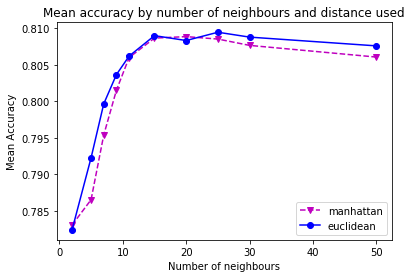

In [13]:
import matplotlib.pyplot as plt

# plot mean scores by the number of neighbours and distance algorithm used
plt.plot([x for x in parameters['n_neighbors']], l1['means'], 'mv--')
plt.plot([x for x in parameters['n_neighbors']], l2['means'],'bo-')
plt.title('Mean accuracy by number of neighbours and distance used')
plt.legend(['manhattan', 'euclidean'])
plt.xlabel('Number of neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

In [14]:
# predictions on test set using the best knn model
predY = best_knn_model.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.813


In [16]:
from sklearn.metrics import confusion_matrix
#confusion matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11159,   523],
       [ 2289,  1029]], dtype=int64)

In [17]:
#ravel() returns a flattened array with true negatives, false positives, false negatives and true positives
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall


# checking if it's correctly calculated
from sklearn.metrics import recall_score
recall_score(y_test, predY)

0.310126582278481

In [18]:
# calculating precision
prec=tp/(tp+fp)
prec

from sklearn.metrics import precision_score
precision_score(y_test, predY)

0.6630154639175257

In [19]:
# calculating f1 measure 
f1= 2*prec*recall / (prec+recall)
f1

from sklearn.metrics import f1_score
f1_score(y_test, predY)

0.4225872689938398

In [20]:
# calculate precision and recall for each class 
from sklearn import metrics
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY)
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

class 0, precision: 0.830, recall: 0.955,  f-score: 0.888
class 1, precision: 0.663, recall: 0.310,  f-score: 0.423


## Decision Tree (Gosia)

In [176]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()

'''
Classifier implementing the decision tree algorithm by using tree representation in which
internal nodes correspond to features, and each leaf node corresponds to a class label.

parameters:
- max_depth - maximum depth of the tree.
- critetion - function that measures the quality of the split. gini = Gini purity, entropy = information gain.
- max_features - number of features to consider when looking for the best split
'''
parameters = {
    'max_depth':range(2,20), 
    'criterion':['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_tree_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8161999999999999 , best parameters :  {'max_depth': 5, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [177]:
gini_sqrt = {
    'means' : []   
}

gini_log2 = {
    'means' : []
}

entropy_sqrt = {
    'means' : []
}

entropy_log2 = {
    'means' : []
}

In [178]:
mean_accuracies = scores['mean_test_score']
params = scores['params']

#plotting the average accuracies for hyper-parameters

for i in range(len(mean_accuracies)):
    if (params[i]['criterion'] == 'gini' and params[i]['max_features'] == 'sqrt'):
        gini_sqrt['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'gini' and params[i]['max_features'] == 'log2'):
        gini_log2['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'entropy' and params[i]['max_features'] == 'sqrt'):
        entropy_sqrt['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'entropy' and params[i]['max_features'] == 'log2'):
        entropy_log2['means'].append(mean_accuracies[i])

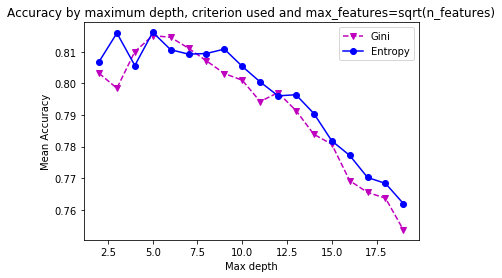

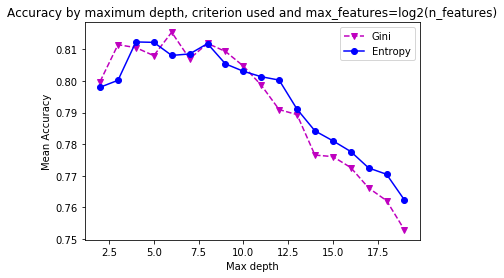

In [179]:
import matplotlib.pyplot as plt

#plotting the average accuracies for hyper-parameters

plt.plot([x for x in parameters['max_depth']], gini_sqrt['means'], 'mv--')
plt.plot([x for x in parameters['max_depth']], entropy_sqrt['means'],'bo-')
plt.title('Accuracy by maximum depth, criterion used and max_features=sqrt(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

plt.plot([x for x in parameters['max_depth']], gini_log2['means'], 'mv--')
plt.plot([x for x in parameters['max_depth']], entropy_log2['means'],'bo-')
plt.title('Accuracy by maximum depth, criterion used and max_features=log2(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

In [180]:
#predictions on test data using the model with the best parameters
predY = best_tree_model.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [181]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.808


In [182]:
from sklearn.metrics import confusion_matrix
#confusion matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11095,   587],
       [ 2292,  1026]], dtype=int64)

In [183]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

#calculating recall
recall=tp/(tp+fn)
print(recall)

0.3092224231464738


In [184]:
#calculating precision
prec=tp/(tp+fp)
print(prec)

0.6360818350898946


In [185]:
#calculating f1 measure 
f1= 2*prec*recall / (prec+recall)
print(f1)

0.41614277022916246


In [186]:
from sklearn import metrics
# calculate precision and recall for each class 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY)
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

class 0, precision: 0.829, recall: 0.950,  f-score: 0.885
class 1, precision: 0.636, recall: 0.309,  f-score: 0.416


#### checking the importance of each feature. Looks like X2, 3,4, 17- have little to no importance [X2=Gender, X3=Education,  X4=Marital status, X17 = amount of bill statement in April, 2005]

In [187]:
best_tree_model.feature_importances_

array([0.06079477, 0.        , 0.        , 0.        , 0.00157282,
       0.14661827, 0.60145114, 0.016391  , 0.02041921, 0.01467101,
       0.0054393 , 0.00480492, 0.00915621, 0.01787252, 0.00453228,
       0.00849657, 0.        , 0.0085261 , 0.01455073, 0.00343113,
       0.00474496, 0.05007373, 0.00645332])

In [190]:
new_X_train = np.delete(X_train, [1,2,3,16], axis=1)
new_X_test = np.delete(X_test, [1,2,3,16], axis=1)

In [193]:
new_X_train.shape

(15000, 19)

In [194]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()

parameters = {
    'max_depth':range(2,20), 
    'criterion':['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(new_X_train, y_train)

best_tree_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8156666666666667 , best parameters :  {'max_depth': 7, 'criterion': 'gini', 'max_features': 'sqrt'}


In [196]:
predY = best_tree_model.predict(new_X_test)

In [197]:
print("accuracy: %.3f" % metrics.accuracy_score(y_test, predY))
print('precision: %.3f' % precision_score(y_test,predY))
print('recall: %.3f'  % recall_score(y_test,predY))
print('f1 score: %.3f' % f1_score(y_test,predY))

accuracy: 0.815
precision: 0.668
recall: 0.323
f1 score: 0.436


In [ ]:
# the performance seems to be slightly better.

## Random Forest (Katie)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, criterion='gini', bootstrap=True)
'''
Classifier implementing the random forest algorithm by generating a specified number of trees, and 
classifying data samples by the mode of classifications from all trees.

parameters:
- n_estimators - number of tree in the random forest.
- max_features - number of features to consider when looking for the best split
'''

parameters = {
    'n_estimators': [500,700,900],
    'max_features': range(10,15), 
}

grid = GridSearchCV(estimator=rfc, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'max_features': 11, 'n_estimators': 900}


In [9]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

y = {
    "500" : [],
    "700" : [],
    "900" : []
}
for p,m, in zip(params_combos, mean_accuracies):
    y[str(p['n_estimators'])].append(m)


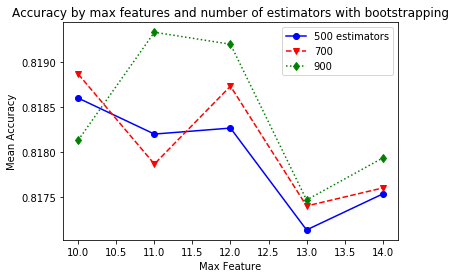

In [10]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['max_features']], [y for y in y['500']], 'bo-')
plt.plot([x for x in parameters['max_features']], [y for y in y['700']], 'rv--')
plt.plot([x for x in parameters['max_features']], [y for y in y['900']], 'gd:')
plt.legend(['500 estimators', '700', '900'])
plt.xlabel('Max Feature')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by max features and number of estimators with bootstrapping")
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score 

best_rfc = grid.best_estimator_

In [12]:
# Predict test values using RFC model with best hyper parameters
predY = best_rfc.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [13]:
# Confusion Matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11115   567]
 [ 2173  1145]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## Bagging (Katie)

In [22]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
'''
Classifier implementing the bagging algorithm by fitting base classifiers each on random subsets 
of the original dataset and then aggreagating their predictions in an ensemble
classifier. 

parameters:
- n_estimators - number of tree in the random forest.
- bootstrap - whether to use replacement or not
- auto: base_estimator - the automatic base estimator is a decision tree
'''

parameters = {
    'n_estimators': [100,300,500,700,900],
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator=bag, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'bootstrap': True, 'n_estimators': 700}


In [23]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

boot = []
no_boot = []
for p,m, in zip(params_combos, mean_accuracies):
    if p['bootstrap'] == True:
        boot.append(m)
    if p['bootstrap'] == False:
        no_boot.append(m)

Text(0.5, 1.0, 'Accuracy by N-estimators')

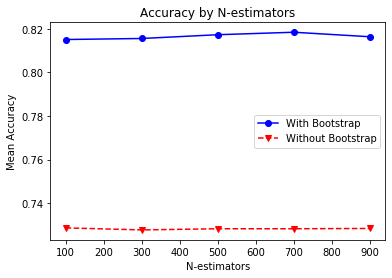

In [24]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['n_estimators']], [x for x in boot], 'bo-')
plt.plot([x for x in parameters['n_estimators']], [x for x in no_boot], 'rv--')
plt.legend(['With Bootstrap', 'Without Bootstrap'])
plt.xlabel('N-estimators')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by N-estimators")
# plt.show()

In [25]:
from sklearn.model_selection import cross_val_score 

best_bag = grid.best_estimator_

In [26]:
# Predict test values using bagging model with best hyper parameters
predY = best_bag.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [27]:
# Confusion Matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11120   562]
 [ 2168  1150]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## Boosting (Katie)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
'''
Classifier implementing the boosting algorithm which builds an additive model by allowing for 
the optimization of arbitrary differentiable loss functions. In each stage, regression trees 
are fitted on the negative gradient of the loss function. 

parameters:
- n_estimators - number of stages.
- loss - which loss measure to use. Deviance refers to the loss of logistic regression, where 
exponential uses AdaBoost loss.
'''

parameters = {
    'n_estimators': [100,300,500,700,900],
    'loss': ['deviance', 'exponential']
}

grid = GridSearchCV(estimator=boost, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'loss': 'deviance', 'n_estimators': 100}


In [29]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

deviance = []
exponential = []
for p,m, in zip(params_combos, mean_accuracies):
    if p['loss'] == 'deviance':
        deviance.append(m)
    if p['loss'] == 'exponential':
        exponential.append(m)

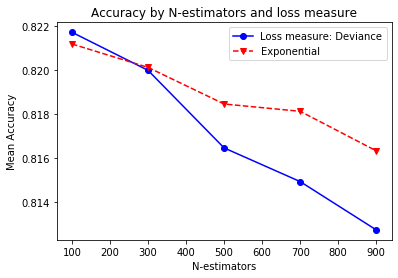

In [30]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['n_estimators']], [x for x in deviance], 'bo-')
plt.plot([x for x in parameters['n_estimators']], [x for x in exponential], 'rv--')
plt.legend(['Loss measure: Deviance', 'Exponential'])
plt.xlabel('N-estimators')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by N-estimators and loss measure")
plt.show()

In [31]:
best_boost = grid.best_estimator_

In [32]:
predY = best_boost.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [33]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11113   569]
 [ 2143  1175]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## SVM (Gosia)

In [34]:
## SVC - the fit time increaes at least quadratically with the number of samples

In [35]:
'''
Tried using PCA to reduce dimensionality (tried 2,4 and 10 components) and to make the algorithm run faster, but 
the accuracy results were lower; seems like it was gettind rid of useful information.
'''
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# pca.fit(X_train)
# X_t_train = pca.transform(X_train)
# X_t_test = pca.transform(X_test)

'\nTried using PCA to reduce dimensionality (tried 2,4 and 10 components) and to make the algorithm run faster, but \nthe accuracy results were lower; seems like it was gettind rid of useful information.\n'

In [36]:
# X_t_train

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classification
svc = SVC(gamma = 'auto')

'''
SVMs find the best way of diving data into two classes by searching for a hyperplane that best divides 
a dataset into two classes. Support vectors are the points nearest to the hyperplane. 

- C -  Regularization parameter. The strength of the regularization is inversely proportional to C. 
    Must be strictly positive. The penalty is a squared l2 penalty.
- kernel - kernel type. 
'''

parameters = {
    
    'C' : [0.01,0.04,0.08,0.1,0.2,0.4,0.8,1,2],
    'kernel' : ['sigmoid','rbf']
    
}

grid = GridSearchCV(estimator = svc, param_grid= parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
grid.fit(X=X_train, y=y_train)
scores = grid.cv_results_
best_svm_model = grid.best_estimator_
print ('best accuracy and parameters are', grid.best_score_, grid.best_params_)

best accuracy and parameters are 0.8190666666666667 {'C': 1, 'kernel': 'rbf'}


In [38]:
sigmoid, rbf = { 'means' : [] }, { 'means' : []}

In [39]:
mean_accuracies = scores['mean_test_score']
params = scores['params']

for i in range(len(mean_accuracies)):
    if (params[i]['kernel'] == 'sigmoid'):
        sigmoid['means'].append(mean_accuracies[i])
    if (params[i]['kernel'] == 'rbf'):
        rbf['means'].append(mean_accuracies[i])


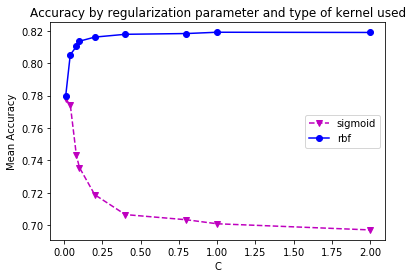

In [40]:
import matplotlib.pyplot as plt


plt.plot([x for x in parameters['C']], sigmoid['means'], 'mv--')
plt.plot([x for x in parameters['C']], rbf['means'],'bo-')
plt.title('Accuracy by regularization parameter and type of kernel used')
plt.legend(['sigmoid', 'rbf'])
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.show()

In [41]:
#predictions using parameters of the best svm model found
predY = best_svm_model.predict(X_test)

In [42]:
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [43]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.819


In [44]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11212,   470],
       [ 2243,  1075]], dtype=int64)

In [45]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.32399035563592526

In [46]:
# precision
prec=tp/(tp+fp)
prec

0.6957928802588996

In [47]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.44211392144766604

In [48]:
from sklearn import metrics
# calculate precision and recall for each class 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY)
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

class 0, precision: 0.833, recall: 0.960,  f-score: 0.892
class 1, precision: 0.696, recall: 0.324,  f-score: 0.442


###############

In [49]:
from sklearn.ensemble import RandomForestClassifier
#{'max_features': 11, 'n_estimators': 900}

rfc = RandomForestClassifier(random_state=0, criterion='gini', bootstrap=True, max_features=11,n_estimators=900)
rfc.fit(X_train, y_train)
predY= rfc.predict(X_test)

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.3f" % metrics.accuracy_score(y_test, predY))
print('precision: %.3f' % precision_score(y_test,predY))
print('recall: %.3f'  % recall_score(y_test,predY))
print('f1 score: %.3f' % f1_score(y_test,predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

[[11115   567]
 [ 2173  1145]]
accuracy: 0.817
precision: 0.669
recall: 0.345
f1 score: 0.455
class 0, precision: 0.836, recall: 0.951,  f-score: 0.890
class 1, precision: 0.669, recall: 0.345,  f-score: 0.455


In [50]:
rfc.feature_importances_

array([0.05867452, 0.01082327, 0.02029721, 0.01301559, 0.0702399 ,
       0.12837551, 0.05061351, 0.02126704, 0.01582306, 0.01553625,
       0.01253096, 0.06285572, 0.05039195, 0.04730939, 0.04604327,
       0.04603862, 0.04759485, 0.05001529, 0.04913348, 0.04711481,
       0.04483442, 0.04432129, 0.04715011])

In [51]:
from sklearn.ensemble import BaggingClassifier

#{'bootstrap': True, 'n_estimators': 300}
bag = BaggingClassifier(bootstrap=True,n_estimators=300)
bag.fit(X_train, y_train)

predY= bag.predict(X_test)

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.3f" % metrics.accuracy_score(y_test, predY))
print('precision: %.3f' % precision_score(y_test,predY))
print('recall: %.3f'  % recall_score(y_test,predY))
print('f1 score: %.3f' % f1_score(y_test,predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

[[11101   581]
 [ 2177  1141]]
accuracy: 0.816
precision: 0.663
recall: 0.344
f1 score: 0.453
class 0, precision: 0.836, recall: 0.950,  f-score: 0.890
class 1, precision: 0.663, recall: 0.344,  f-score: 0.453


In [52]:
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(loss='deviance', n_estimators=100)

boost.fit(X_train, y_train)

predY = boost.predict(X_test)

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.3f" % metrics.accuracy_score(y_test, predY))
print('precision: %.3f' % precision_score(y_test,predY))
print('recall: %.3f'  % recall_score(y_test,predY))
print('f1 score: %.3f' % f1_score(y_test,predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.3f, recall: %.3f,  f-score: %.3f" % (c, precision[c], recall[c], fscore[c]))

[[11114   568]
 [ 2143  1175]]
accuracy: 0.819
precision: 0.674
recall: 0.354
f1 score: 0.464
class 0, precision: 0.838, recall: 0.951,  f-score: 0.891
class 1, precision: 0.674, recall: 0.354,  f-score: 0.464


In [53]:
boost.feature_importances_

array([0.02996648, 0.00177865, 0.00449178, 0.00590731, 0.01434409,
       0.60501223, 0.09266089, 0.01492025, 0.01962911, 0.02510697,
       0.01394969, 0.03573392, 0.01375263, 0.00753744, 0.00773003,
       0.00516979, 0.00736635, 0.02223029, 0.02654245, 0.01440919,
       0.01262866, 0.01245396, 0.00667783])

## Conclusion

After tuning, all of these algorthms give very similar results. The best versions of boosting and svm, however, achieved slightly better results than every other method that we have tested. Random Forest, Bagging, Boosting algorithms are examples of ensemble methods which gain power by using many repreated instances of themselves, which explains why they are able to achieve results better than KNN and Decision Tree. Our SVM model exhibited the highest accuracy of .819 using a regularization variable of 1 and an radial basis function kernel. 

All of our models exhibited relatively high precision but low recall for class 1, indicating that the models may have been a bit overfitted; of all the yes instances predicted by the models, a relatively high percent were actually yes instances, but our models only predicted 30 - 35 % of these true yes instances. This could be a sign of overfitting, because our models may be too highly tuned to noise in training sets that require too much specificity for a data sample to be labeled 1. Alternatively, it may be because in both the training an test sets of target values, there are more than 3x as many class 0s as 1s, and thus the models are better tuned to correctly identifying class 0 instances; all models also have very high precision and recall for class 0. That said, our SVM model still exhibited one of the higher recall valeus for class 1, and would therefore be the best suited. 